In [1]:
# Proper Orthogonal Decomposition (POD) example 

import numpy as np

A = np.array([
    [2, 3, 1, 5, 4],
    [4, 6, 2, 10, 8],
    [1, 1, 1, 2, 2],
    [3, 4, 2, 6, 5],
    [5, 7, 3, 12, 9],
])

U, S, VT = np.linalg.svd(A, full_matrices=True)

# POD modes
modes = U

# Singular values
singular_values = S

# Temporal coefficients
coefficients = VT

In [2]:
modes

array([[-2.83679327e-01, -2.31613458e-01, -2.29808556e-01,
        -1.14320921e-01, -8.94427191e-01],
       [-5.67358654e-01, -4.63226916e-01, -4.59617112e-01,
        -2.28641843e-01,  4.47213595e-01],
       [-1.24392867e-01,  5.53897684e-01, -6.53654634e-01,
         5.00459179e-01, -3.73312492e-15],
       [-3.62148132e-01,  6.50928817e-01,  1.17695809e-01,
        -6.56725287e-01,  1.94289029e-15],
       [-6.71569313e-01,  3.55676957e-02,  5.42976476e-01,
         5.02897745e-01,  1.44328993e-15]])

In [3]:
singular_values

array([2.61274321e+01, 9.55229681e-01, 5.08472233e-01, 4.31607367e-01,
       5.94750589e-16])

In [4]:
coefficients

array([[-2.83436852e-01, -4.02992550e-01, -1.63881153e-01,
        -6.72568563e-01, -5.27309255e-01],
       [ 3.85653881e-01, -7.07840725e-02,  8.42091835e-01,
        -3.66567158e-01,  5.26360903e-02],
       [ 2.28585958e-01,  3.35978214e-01,  1.21193701e-01,
         3.33094681e-01, -8.42156233e-01],
       [-2.28071103e-01, -7.43665646e-01,  2.87523440e-01,
         5.49843596e-01, -9.97360070e-02],
       [-8.16496581e-01,  4.08248290e-01,  4.08248290e-01,
        -6.10622664e-16,  2.22044605e-16]])

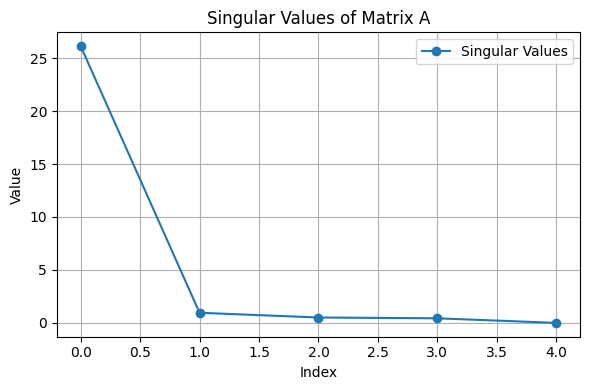

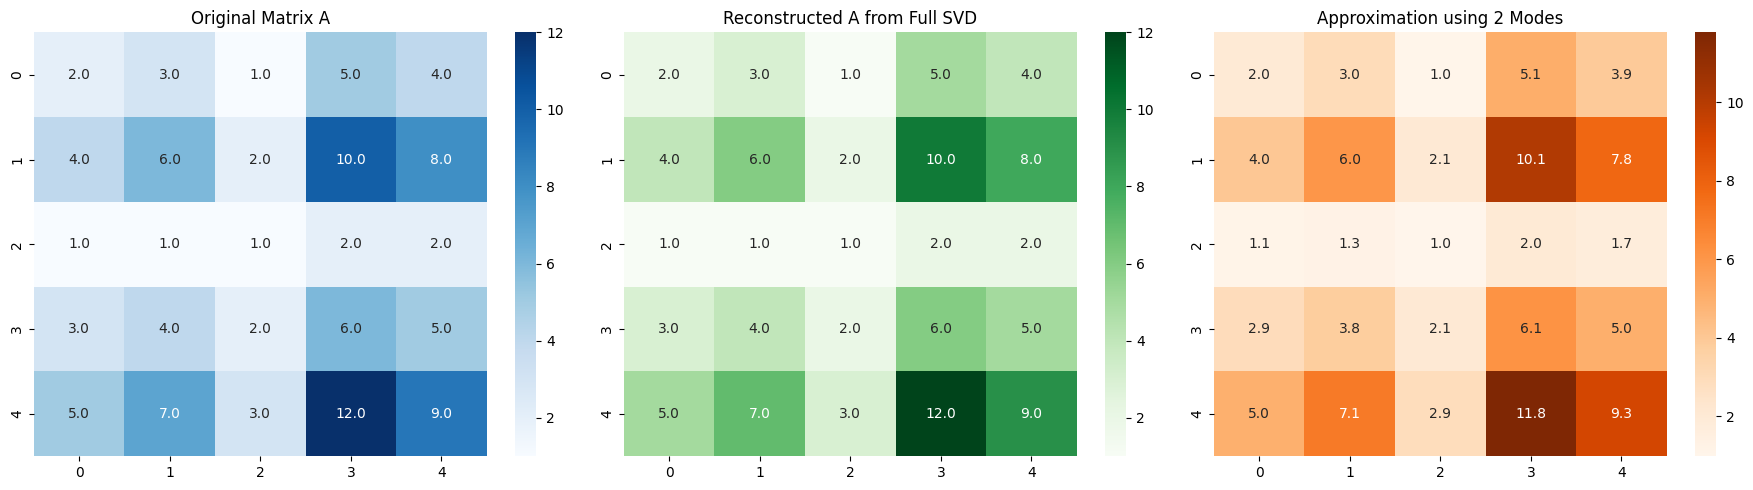

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Original matrix A
A = np.array([
    [2, 3, 1, 5, 4],
    [4, 6, 2, 10, 8],
    [1, 1, 1, 2, 2],
    [3, 4, 2, 6, 5],
    [5, 7, 3, 12, 9],
])

# Perform SVD
U, S, VT = np.linalg.svd(A, full_matrices=True)

# Reconstruct the matrix from SVD
S_matrix = np.zeros((5, 5))
np.fill_diagonal(S_matrix, S)
A_reconstructed = U @ S_matrix @ VT

# Truncate to first 2 modes
U2 = U[:, :2]
S2 = np.diag(S[:2])
VT2 = VT[:2, :]
A_approx = U2 @ S2 @ VT2

# Prepare DataFrames for display
df_U = pd.DataFrame(U, columns=[f"Mode {i+1}" for i in range(U.shape[1])])
df_S = pd.DataFrame(np.diag(S_matrix), columns=["Singular Values"])
df_VT = pd.DataFrame(VT, columns=[f"t{i+1}" for i in range(VT.shape[1])])

# Plot singular values
plt.figure(figsize=(6, 4))
plt.plot(S, 'o-', label='Singular Values')
plt.title('Singular Values of Matrix A')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Show heatmaps
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(A, annot=True, fmt=".1f", ax=axs[0], cmap="Blues")
axs[0].set_title("Original Matrix A")

sns.heatmap(A_reconstructed, annot=True, fmt=".1f", ax=axs[1], cmap="Greens")
axs[1].set_title("Reconstructed A from Full SVD")

sns.heatmap(A_approx, annot=True, fmt=".1f", ax=axs[2], cmap="Oranges")
axs[2].set_title("Approximation using 2 Modes")

plt.tight_layout()
plt.show()